# Chapter 4: Training Models

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
x = 2*np.random.rand(100,1)

y = 4+3*x + np.random.randn(100,1)

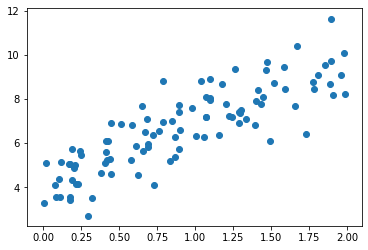

In [3]:
plt.scatter(x,y)

In [4]:
x_b = np.c_[np.ones((100,1)),x]

theta_best = np.linalg.inv(((x_b.T).dot(x_b))).dot(x_b.T).dot(y)

theta_best

array([[4.179343  ],
       [2.75141938]])

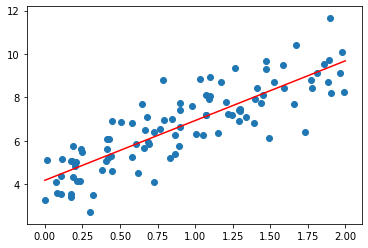

In [5]:
x_new = np.array([[0],[2]])

x_new_b = np.c_[np.ones((2,1)),x_new]

y_predict = x_new_b.dot(theta_best)

plt.plot(x_new, y_predict, 'r-')
plt.scatter(x, y)

In [6]:
theta_best

array([[4.179343  ],
       [2.75141938]])

In [7]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(x,y)

lin_reg.intercept_, lin_reg.coef_

(array([4.179343]), array([[2.75141938]]))

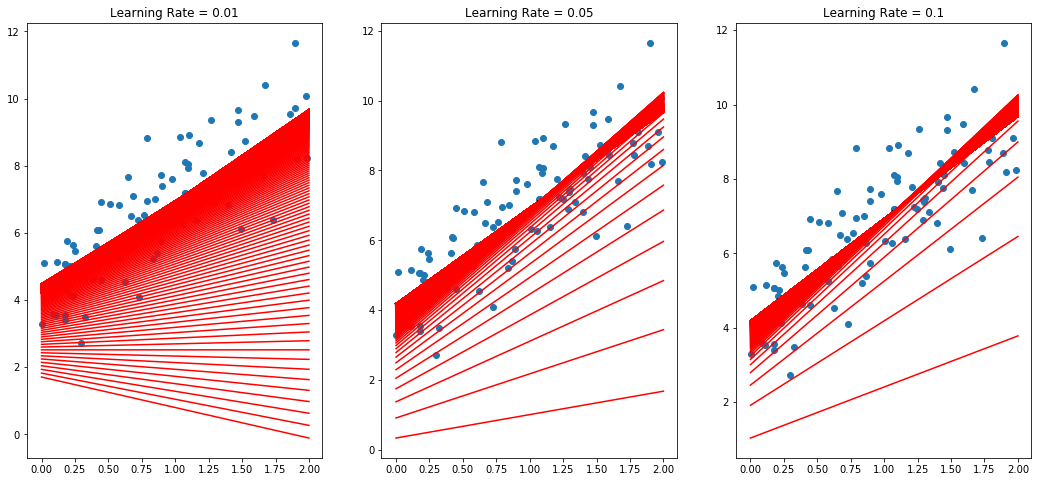

In [8]:
l_rate = 0.01

n_iterations = 1000

m = 100

theta = np.random.randn(2,1)

fig, axes = plt.subplots(figsize=(18,8), ncols = 3)

axes[0].scatter(x, y)

for iteration in range(n_iterations):
    
    gradients = 2/m * x_b.T.dot(x_b.dot(theta)-y)
    
    theta = theta - l_rate*gradients

    y_predict = x_new_b.dot(theta)
    
    axes[0].plot(x_new, y_predict, 'r-')
    
    axes[0].set_title('Learning Rate = 0.01')

l_rate = 0.05

n_iterations = 1000

m = 100

theta = np.random.randn(2,1)
axes[1].scatter(x, y)

for iteration in range(n_iterations):
    
    gradients = 2/m * x_b.T.dot(x_b.dot(theta)-y)
    
    theta = theta - l_rate*gradients

    y_predict = x_new_b.dot(theta)
    
    axes[1].plot(x_new, y_predict, 'r-')
    
    axes[1].set_title('Learning Rate = 0.05')
    
l_rate = 0.1

n_iterations = 1000

m = 100

theta = np.random.randn(2,1)

axes[2].scatter(x, y)

for iteration in range(n_iterations):
    
    gradients = 2/m * x_b.T.dot(x_b.dot(theta)-y)
    
    theta = theta - l_rate*gradients

    y_predict = x_new_b.dot(theta)
    
    axes[2].plot(x_new, y_predict, 'r-')
    axes[2].set_title('Learning Rate = 0.1')


In [9]:
# gradiente descendente estocástico

n_epochs = 50

t0,t1 = 5,50

theta = np.random.randn(2,1)

def learning_schedule(t):
    
    return t0/(t+t1)

for epoch in range(n_epochs):

    for i in range(m):
    
        random_index = np.random.randint(m)
        
        xi = x_b[random_index:random_index+1]
        
        yi = y[random_index:random_index+1]
        
        gradients = 2*xi.T.dot(xi.dot(theta)-yi)

        eta = learning_schedule(epoch*m+i)
        
        theta = theta - eta*gradients

In [10]:
theta

array([[4.17751817],
       [2.76822296]])

In [11]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(x,y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [12]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.12206654]), array([2.69703104]))

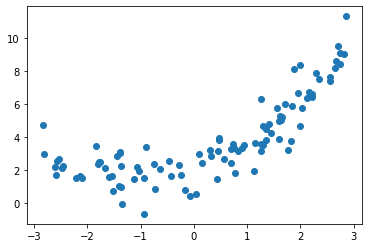

In [13]:
m = 100

x = 6*np.random.rand(m,1) - 3

y = 0.5*x**2 + x + 2 + np.random.randn(m,1)

plt.scatter(x,y)

In [14]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)

x_poly = poly_features.fit_transform(x)

print(x[0])

print(x_poly[0])

[-1.38333179]
[-1.38333179  1.91360685]


In [15]:
lin_reg = LinearRegression()
lin_reg.fit(x_poly,y)

lin_reg.intercept_, lin_reg.coef_

(array([2.04176692]), array([[1.03943009, 0.52507729]]))

In [16]:
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split

def curva_de_aprendizado(model, X,Y):

    X_TRAIN, X_VAL, Y_TRAIN, Y_VAL = train_test_split(X,Y,test_size=0.3)
    
    train_errors, val_errors = [], []
    
    for m in range(1, len(X_TRAIN)):
        
        model.fit(X_TRAIN[:m], Y_TRAIN[:m])
        y_val_pred = model.predict(X_VAL)
        y_train_pred = model.predict(X_TRAIN[:m])
        
        train_errors.append(mean_squared_error(Y_TRAIN[:m],y_train_pred))
        val_errors.append(mean_squared_error(Y_VAL,y_val_pred))
    
    figure = plt.figure(figsize=(16,8))
    
    plt.plot(np.sqrt(train_errors),'r-+', label='Treino')
    
    plt.plot(np.sqrt(val_errors),'b-', label='Validação')
    
    plt.legend()
    
    plt.grid()
    
    

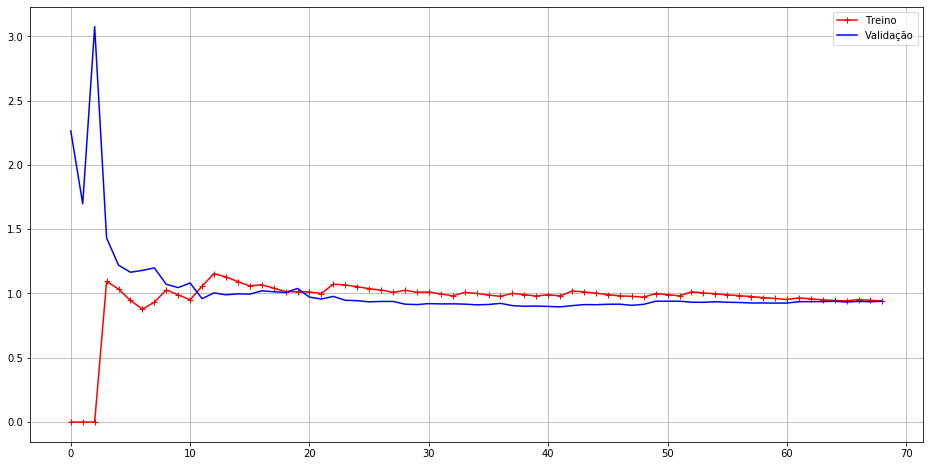

In [17]:
curva_de_aprendizado(lin_reg, x_poly,y)

In [18]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=10, include_bias=False)

x_poly = poly_features.fit_transform(x)

print(x[0])

print(x_poly[0])

[-1.38333179]
[ -1.38333179   1.91360685  -2.64715319   3.66189117  -5.06561048
   7.00742003  -9.69358692  13.40944697 -18.54971432  25.66040957]


(0, 4)

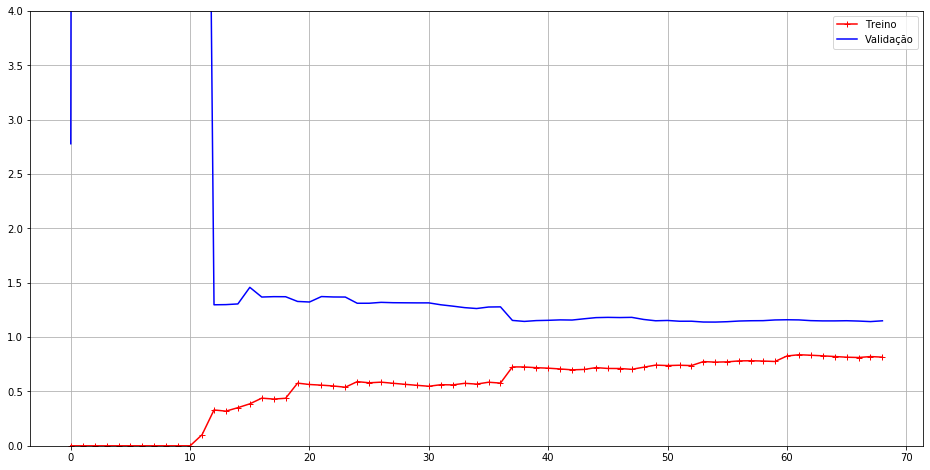

In [19]:
curva_de_aprendizado(lin_reg, x_poly,y)
plt.ylim(0,4)

In [20]:
x = 2*np.random.rand(1200,1)

y = 4+3*x + np.random.randn(1200,1)

x_train = x[:1000]

x_val = x[1000:1200]

y_train = y[:1000]

y_val = y[1000:1200]


In [21]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=50, solver='cholesky')

ridge_reg.fit(x,y)

ridge_reg.predict([[1.2]])

array([[7.52070676]])

In [22]:
sgd_reg = SGDRegressor(penalty='l2')

sgd_reg.fit(x,y)

sgd_reg.predict([[1.2]])

/home/rafaelpavan95/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


array([7.60354457])

In [23]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)

lasso.fit(x,y)


lasso.predict([[1.2]])

array([7.52821575])

In [24]:
from sklearn.linear_model import ElasticNet

elastic = ElasticNet(alpha=0.1, l1_ratio=0.5)

elastic.fit(x,y)


elastic.predict([[1.2]])

array([7.47973315])

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

poly_scaler = Pipeline([('pf', PolynomialFeatures(degree=90, include_bias=False)), ('stds', StandardScaler())])

poly_scaler = Pipeline([("poly_features", PolynomialFeatures(degree=90, include_bias=False)),("std_scaler", StandardScaler())])
X_train_poly_scaled = poly_scaler.fit_transform(x_train)
X_val_poly_scaled = poly_scaler.transform(x_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,penalty=None, learning_rate="constant", eta0=0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None

for epoch in range(1000):
    
    sgd_reg.fit(X_train_poly_scaled, y_train.ravel()) # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val.ravel(), y_val_predict)
    
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

In [26]:
best_model

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             tol=-inf, warm_start=True)

In [27]:
best_epoch

511

In [30]:
from sklearn import datasets
iris = datasets.load_iris()

x = iris['data'][:,3:]
y = (iris['target']==2).astype(np.int)


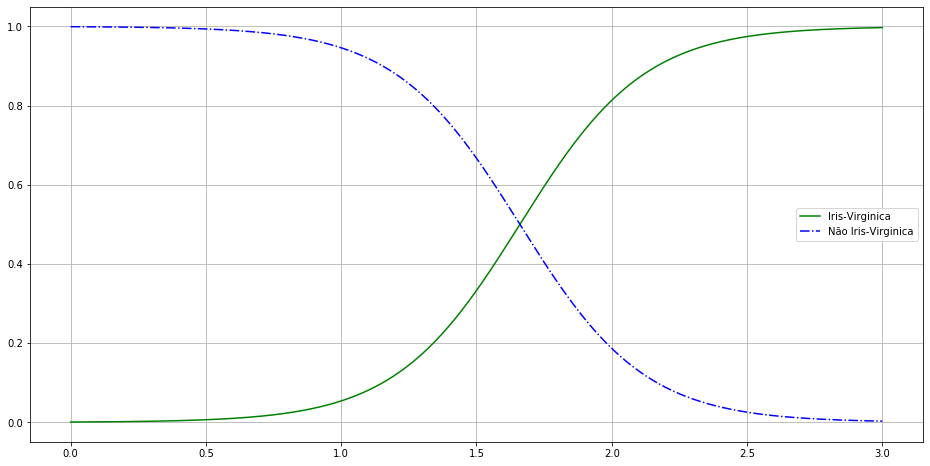

In [35]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

log_reg.fit(x,y)

y_proba = log_reg.predict_proba(np.linspace(0,3,1000).reshape(-1,1))

plt.figure(figsize=(16,8))

plt.plot(np.linspace(0,3,1000).reshape(-1,1), y_proba[:,1],'g-',label='Iris-Virginica')

plt.plot(np.linspace(0,3,1000).reshape(-1,1), y_proba[:,0],'b-.',label='Não Iris-Virginica')

plt.grid()

plt.legend()


In [36]:
log_reg.predict([[1.7],[1.5]])

array([1, 0])

In [38]:
x = iris['data'][:,(2,3)]
y = iris['target']

softmax = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)

softmax.fit(x,y)

softmax.predict([[5,2]])


array([2])

In [39]:
softmax.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

# Exercises:

### What Linear Regression training algorithm can you use if you have a training set with millions of features?

We can use algorithms based in gradient descent: Batch, Mini-Batch, Stochastic...

### Suppose the features in your training set have very different scales. What algorithms might suffer from this, and how? What can you do about it?

Algorithms based in gradient descent: Batch, Mini-Batch, Stochastic... In this case, we must normalize (feature scaling) data before apply the regression method. 

### Can Gradient Descent get stuck in a local minimum when training a Logistic Regression model?

Gradient Descent doesn't get stuck in a local minimum in Logistic Regression because the cost function is convex.

### Do all Gradient Descent algorithms lead to the same model provided you let them run long enough?

No, because exact optimization methods are sensitive to initial points and learning rate value.

### Suppose you use Batch Gradient Descent and you plot the validation error at every epoch. If you notice that the validation error consistently goes up, what is likely going on? How can you fix this?

If the training error also goes up, it can be a problem with the learning rate. Otherwise, must be a overfitting problem.

### Is it a good idea to stop Mini-batch Gradient Descent immediately when the validation error goes up?

Both models choose data in a random way. There is no guarantee that the error will be minimized. The best action is to save the model frequently and wait some time before stopping.

### Which Gradient Descent algorithm (among those we discussed) will reach the vicinity of the optimal solution the fastest? Which will actually converge? How can you make the others converge as well?

Stochastic is the fastest. Batch has the convergence guarantee, but stochastic and mini-batch will only get near of the optimal point.

### Suppose you are using Polynomial regression, you plot the learning curves and you notice that there is a large gap between the training error and the validation error. What is happening? What are three ways to solve this?

Probably the model is overfitting, because of the high degree you had chosen. You can add regularization Ridge (L1), Lasso (L2) and ElasticNet. Also you can reduce the model's complexity (degrees) or reduce the number of features. 

### Suppose you are using Ridge regression and you notice that the training error and the validation error are almost equal and fairly high: would you say that the model suffers from high bias or high variance? Should you increase the regularization hyperparameter α or reduce it?

I would say that the model is suffering from high bias (underfitting) because of the high value of alpha you had adopted. So, we should reduce this value.

### Why would you want to use:

### a. Ridge Regression instead of plain Linear Regression?

    Ridge Regression helps to regularizes the Linear Regression, avoiding overfitting.

### b. Lasso instead of Ridge Regression?

    Lasso (L2) uses norm regularization, eliminating the weights of the least important features. Good for when you suspect that only a few features really matters. 
    
### c. Elastic Net instead of Lasso?
    
    Elastic Net is preferred over Lasso if there are more features than observations, and if the features are strongly correlated with each other.

### Suppose you want to classify pictures as outdoor/indoor and daytime/nighttime, should you implement two Logistic Regression classifiers or one Softmax Regression classifier?

I would use Logistic Regression Classifier, because Softmax can't handle classes with multiple outpus.